pyggplot examples
===
This closely follows the ggplot book.
The syntax in python is obviously different - for a start,
we don't have a qplot function, but always build plot objects.

But let's get started.

In [15]:
#imports and R magic
try:
    import exptools # Don't worry about this
    exptools.load_software('pyggplot')
except ImportError:
    pass
import pandas
import pandas.rpy
import pyggplot
Plot = pyggplot.Plot
pyggplot.ipython_plot_width = 200
pyggplot.ipython_plot_height = 200
import rpy2.robjects as ro
quiet = ro.r('library("ggplot2")')
import numpy 
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [16]:
#this is the example data set from the ggplot book
diamonds = pandas.rpy.common.load_data('diamonds')
#but the book only uses one hundred samples
numpy.random.seed(1410) # make this reproducible
chosen = numpy.random.choice(diamonds.index, 100)
dsmall = diamonds.ix[chosen]

In [17]:
%Rpush chosen
%R dsmall = diamonds[chosen,  ]
None

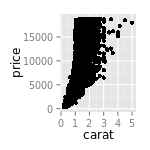

<FloatVector - Python:0xc736998 / R:0x93f3f08>
[5.426667, 4.826667]

In [18]:
#A simpule scatter plot - in R using the qplot function

%R -w 150 -h 150 -u px plot(qplot(carat, price, data=diamonds))
#Which translates to ggplot(diamonds) + geom_point(carat, price)
None #to silence [Listvector...] output
%R par()$pin

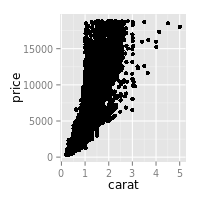

In [19]:
#Same thing in python
pyggplot.Plot(diamonds).add_scatter('carat', 'price')
#virtually every function of the Plot object returns the Plot object, so you can chain them like this.

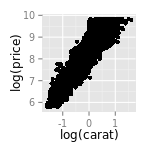

In [20]:
#R allows passing in functions of values - python does not
%R -w 150 -h 150 -u px plot(qplot(log(carat), log(price), data=diamonds))
None

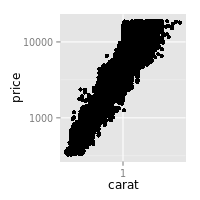

In [21]:
#But in this case, we can simply transform the axis
#And we'll do it step  by step in this example
p = pyggplot.Plot(diamonds)
p.add_scatter('carat', 'price')
p.scale_x_continuous(trans='log10')
p.scale_y_continuous(trans='log10')

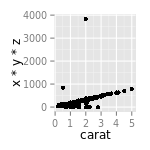

In [22]:
#arguments to qplot can be combinations of existing variables
%R -w 150 -h 150 -u px  plot(qplot(carat, x * y * z, data=diamonds))
None

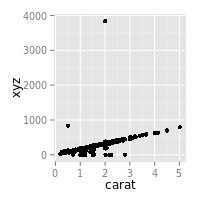

In [23]:
#In Python, you have to specify a dataframe column - not a function to plot
#so we have to prepare the data in python.
diamonds['xyz' ] = diamonds['x'] * diamonds['y'] * diamonds['z']
pyggplot.Plot(diamonds).add_scatter('carat','xyz')

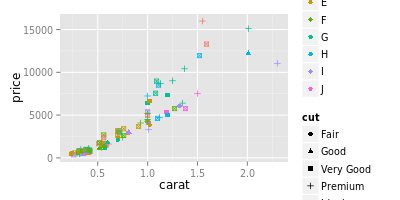

In [24]:
#Colors and shapes
%R -w 400 -h 200 -u px  plot(qplot(carat, price, data=dsmall, color=color, shape=cut))
None

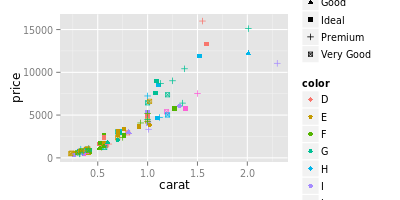

In [25]:
#now we'll drop the pyggplot, and add some color and shapes
p = Plot(dsmall).add_scatter('carat', 'price', color='color', shape='cut')
p.ipython_plot_width = 400 #you can also pass the width to plot.render when writing to a file
p.ipython_plot_height = 200
p

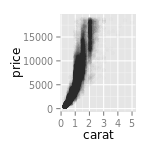

In [26]:
#overplotting was a problem for the complete dataset, but we can reduce the opacity with the alpha parameter
%R -w 150 -h 150 -u px  plot(qplot(carat, price, data = diamonds, alpha=I(1/100)))
None

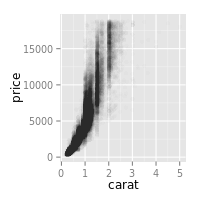

In [27]:
#overplotting was a problem for the complete dataset, but we can reduce the opacity with the alpha parameter
#In R: qplot(carat, price, data = diamonds, alpha=I(1/100))
Plot(diamonds).add_scatter('carat','price', alpha=1/100.)

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


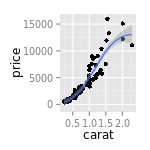

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


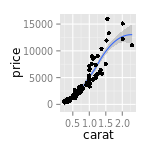

In [28]:
#Adding a smoother plot, combining two geoms. Once with the qplot interface
%R -w 150 -h 150 -u px  plot(qplot(carat, price, data = dsmall, geom = c("point", "smooth")))
#and once with the + geom interface.
#Our python stuff is closer to the geom interface
%R -w 150 -h 150 -u px  plot(ggplot(dsmall) + geom_smooth(aes(carat, price)) + geom_point(aes(carat, price)))
None
#We could also have 

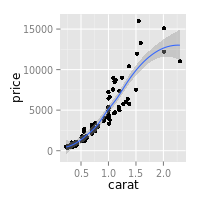

In [29]:
#In Python
Plot(dsmall).add_scatter('carat','price').add_smooth('carat','price', method='loess')

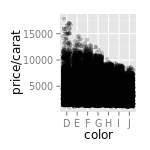

In [30]:
#Hourribly overprinterd jitter plots
%R -w 150 -h 150 -u px  plot(qplot(color, price / carat, data=diamonds, geom="jitter", alpha=I(1/5)))
None

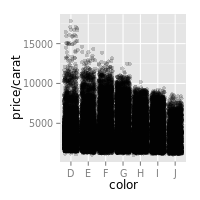

In [31]:
diamonds['price/carat'] = diamonds['price'] / diamonds['carat']
Plot(diamonds).add_jitter('color', 'price/carat', alpha = 1/5.)

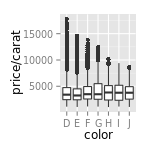

In [32]:
#Box plots
#Hourribly overprinterd jitter plots
%R -w 150 -h 150 -u px plot(qplot(color, price / carat, data=diamonds, geom="boxplot"))
None

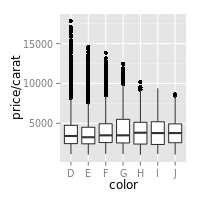

In [33]:
diamonds['price/carat'] = diamonds['price'] / diamonds['carat']
Plot(diamonds).add_box_plot('color', 'price/carat') # Note added _ between box and plot

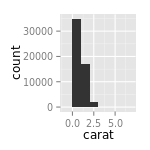

In [34]:
#histograms...
%R -w 150 -h 150 -u px plot(qplot(carat, data=diamonds, geom='histogram', binwidth = 1))
None

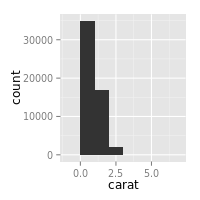

In [35]:
Plot(diamonds).add_histogram('carat', bin_width=1) # note the additional underscore

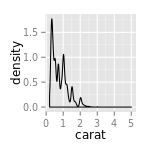

In [36]:
#Density
#histograms...
%R -w 150 -h 150 -u px  plot(qplot(carat, data=diamonds, geom='density'))
None

In [37]:
p = Plot(diamonds).add_density('carat')

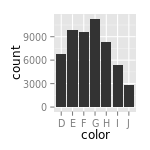

In [38]:
#bar charts
%R -w 150 -h 150 -u px plot(qplot(color, data=diamonds, geom='bar'))
None

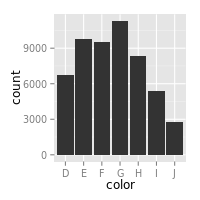

In [39]:
Plot(diamonds).add_bar('color', '..count..', stat='bin') #The python wrapper does not set the default stat to bin 

In [40]:
#switching datasets for the line plots
economics = pandas.rpy.common.load_data('economics')
%R year = function(x) as.POSIXlt(x)$year + 1900
economics['year'] = ro.r('year(economics$date)') # convert date into a year

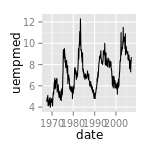

In [41]:
%R -w 150 -h 150 -u px plot(qplot(date,uempmed, data=economics, geom = "line"))
None

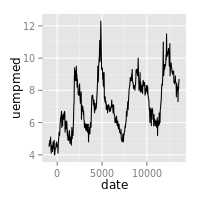

In [42]:
Plot(economics).add_line('date', 'uempmed')

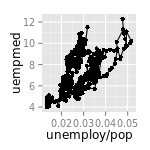

In [43]:
%R -w 150 -h 150 -u px plot(qplot(unemploy / pop, uempmed, data = economics,geom = c("point", "path")))
None

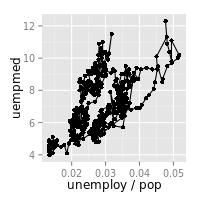

In [44]:
economics['unemploy / pop'] = economics['unemploy'] / economics['pop']
Plot(economics).add_scatter('unemploy / pop', 'uempmed').add_path() #You can omit mandatory mappings an subsequent calls

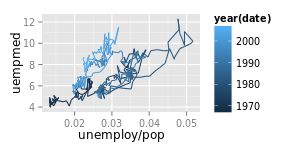

In [45]:
%R year = function(x) as.POSIXlt(x)$year + 1900
%R -w 300 -h 150 -u px plot(qplot(unemploy / pop, uempmed, data = economics,geom = "path", colour = year(date)))
None

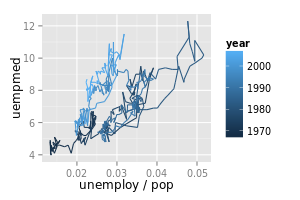

In [46]:
p = Plot(economics).add_path('unemploy / pop', 'uempmed', color = 'year') # remember, we converted date into year earlier
p.ipython_plot_width = 300
p

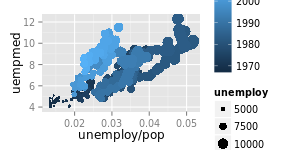

In [66]:
#Since the book talked about scale_area - which is now called scale_size_area
#but the example actually didn't need an area scaled size, here is an example
#first without size area
%R -w 300 -h 150 -u px plot(qplot(unemploy / pop, uempmed, data = economics,geom = "point", colour = year(date), size=unemploy) )
None

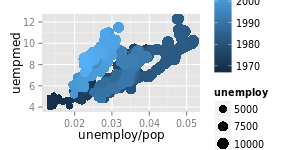

In [67]:
#Since the book talked about scale_area - which is now called scale_size_area
#but the example actually didn't need an area scaled size, here is an example
#then with it.
%R -w 300 -h 150 -u px plot(qplot(unemploy / pop, uempmed, data = economics,geom = "point", colour = year(date), size=unemploy) + scale_size_area())
None

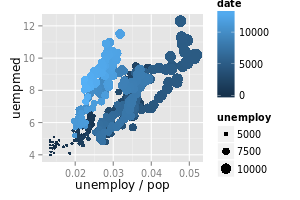

In [68]:
#python without
p = Plot(economics).add_scatter('unemploy / pop', 'uempmed', color = 'date', size='unemploy')
p.ipython_plot_width = 300
p

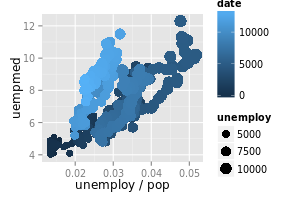

In [69]:
#python with
p = Plot(economics).add_scatter('unemploy / pop', 'uempmed', color = 'date', size='unemploy').scale_size_area()
p.ipython_plot_width = 300
p

Faceting
===

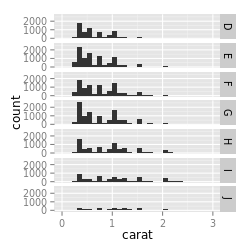

In [70]:
%R -w 250 -h 250 -u px plot(qplot(carat, data = diamonds, facets = color ~ .,geom = "histogram", binwidth = 0.1, xlim = c(0, 3)))
None
        

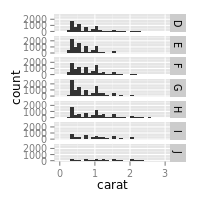

In [72]:
p = Plot(diamonds).add_histogram('carat', bin_width=0.1).facet_grid(rows='color').scale_x_continuous(limits = [0,3])
p.ipython_plot_height = 200
p.ipython_plot_width = 200
p

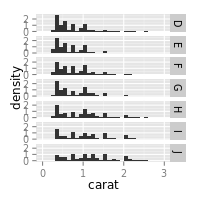

In [73]:
%R -w 200 -h 200 -u px plot(qplot(carat, ..density.., data=diamonds, facets = color ~ ., geom="histogram", binwidth=0.1, xlim=c(0,3)))
None

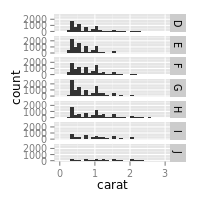

In [54]:
Plot(diamonds).add_histogram('carat', '..density..', bin_width=0.1).facet_grid(rows='color').scale_x_continuous(limits = [0,3])

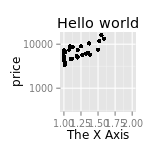

In [55]:
#some more options from section 2.7 of the ggplot book
#limits, label renaming, log, title setting
%R -w 150 -h 150 -u px plot(ggplot(dsmall) + ggtitle("Hello world") + geom_point(aes(carat, price)) + scale_x_continuous(name='The X Axis', limits=c(1,2)) + scale_y_continuous( trans='log10'),limits=c(0,5000)) #ggplot helpfully ignores thes limits
None

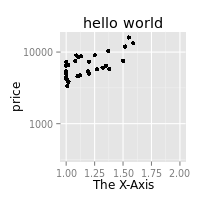

In [56]:
p = Plot(dsmall).add_scatter('carat', 'price')
p.scale_x_continuous(limits=[1,2.], name = 'The X-Axis')
p.scale_y_continuous(trans='log10')  # passing limits together with a transformation get's an error somewhere in ggplot
p.set_title('hello world')
#I guess that's better than showing the wrong graph :)

In [57]:
mpg = pandas.rpy.common.load_data('mpg')

Building plots layer by layer
===
Here we use the ggplot + geom*  syntax in R - see chapter 4 of the ggplot b ook

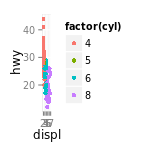

In [58]:
%R -w 150 -h 150 -u px plot(ggplot(mpg) + geom_point(aes(displ, hwy, color=factor(cyl))))
None

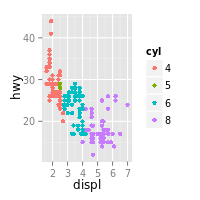

In [59]:
mpg['cyl'] = pandas.Categorical(mpg['cyl'])  # equivalent to factor
Plot(mpg).add_scatter('displ', 'hwy', color='cyl')

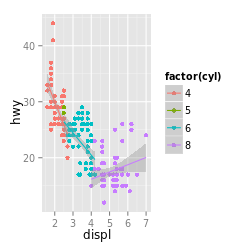

In [78]:
#let's add some linear regression
%R -w 250 -h 250 -u px plot(ggplot(mpg) + geom_point(aes(displ, hwy, color=factor(cyl))) + geom_smooth(aes(displ, hwy, color=factor(cyl)), method='lm'))
None

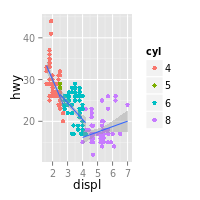

In [61]:
#What if you don't want the linear regressions to be colored by cyl? use group
Plot(mpg).add_scatter('displ', 'hwy', color='cyl').add_smooth(group='cyl',method='lm') 
#We have to repeat color - it's not a required argument and therefore needs to be filled in again!

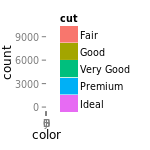

In [62]:
#stacked bar charts
%R -w 150 -h 150 -u px plot(ggplot(diamonds) + geom_bar(aes(color, fill=cut)))
None

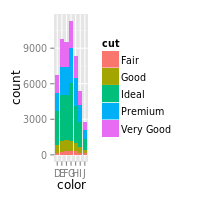

In [63]:
Plot(diamonds).add_bar('color', '..count..', fill='cut', stat='bin', position='stack')

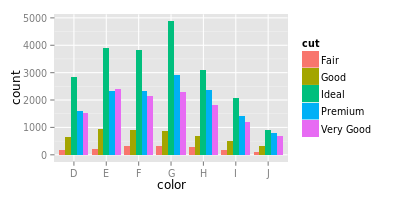

In [76]:
#or side by side (the default)
p = Plot(diamonds).add_bar('color', '..count..', fill='cut', stat='bin', position='dodge')
p.ipython_plot_width = 400
p

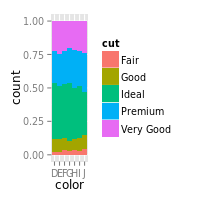

In [65]:
#or filled to 100%
Plot(diamonds).add_bar('color', '..count..', fill='cut', stat='bin', position='fill')